<a name="demo_notebook_top"></a>

# Data Cube Python Notebook Demonstration
by Brian Killough (NASA SEO)
* Connect to a Data Cube
* Select a region and time range 
* Display image details (bands, cloud mask, RGB)
* Create a cloud-filtered median mosaic
* Run the WOFS water detection algorithm
* Run the Fractional Cover algorithm
* Plot indices (NDVI, NDWI, NWBI)
* Run the TSM Water Quality (suspended matter) algorithm
* Run a time series cloud cover analysis
* Run a time series WOFS water detection analysis

<hr>

# Index

* [Import Dependencies and Connect to the Data Cube](#demo_notebook_import)
* [Browse the Available Products on the Storage Platform](#demo_notebook_browse_products)
* [Choose Platform and Product](#demo_notebook_plat_prod)
* [Get the Extents of the Cube](#demo_notebook_extents)
* [Define the Extents of the Analysis](#demo_notebook_define_extents)
* [Load and Visualize the Data](#demo_notebook_retrieve_data)
* [Creating Composites](#demo_notebook_create_composites)
* [Water Detection](#demo_notebook_water_detection)
* [Fractional Cover](#demo_notebook_fractional_cover)
* [Spectral Indicies](#demo_notebook_spectral_indicies)

## <a id="demo_notebook_import"></a>Import Dependencies and Connect to the Data Cube [&#9652;](#demo_notebook_top)

In [1]:
import sys
import os
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

import numpy as np

import datacube
import utils.data_cube_utilities.data_access_api as dc_api
api = dc_api.DataAccessApi()
dc = api.dc

## <a id="demo_notebook_browse_products"></a>Browse the Available Products on the Storage Platform [&#9652;](#demo_notebook_top)

> You might want to learn more about what data is available and how it is stored.

In [2]:
list_of_products = dc.list_products()
list_of_products

,name,description,instrument,lat,time,label,format,lon,platform,product_type,creation_time,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
23,alos_palsar_mosaic,ALOS/PALSAR and ALOS-2/PALSAR-2 annual mosaic ...,PALSAR/PALSAR-2,None,None,None,GeoTIFF,None,ALOS/ALOS-2,gamma0,None,EPSG:4326,"(-0.000222222222222, 0.000222222222222)","(5, 5)","(latitude, longitude)"
22,from_glc_ghana,FROM-GLC Land Classification Data,FROM-GLC,None,None,None,GeoTiff,None,FROM-GLC,FROM-GLC,None,EPSG:4326,"(-0.00027777777778, 0.00027777777778)",None,"(latitude, longitude)"
26,jers_sar_mosaic,JERS-1 SAR annual mosaic tiles generated for u...,SAR,None,None,None,GeoTIFF,None,JERS-1,gamma0,None,EPSG:4326,"(-0.000222222222222, 0.000222222222222)","(5, 5)","(latitude, longitude)"
12,ls7_collections_sr_scene,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,None,GeoTiff,None,LANDSAT_7,LEDAPS,None,NaN,NaN,NaN,NaN
13,ls7_ledaps_ghana,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,None,NetCDF,None,LANDSAT_7,LEDAPS,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
17,ls7_ledaps_kenya,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,None,NetCDF,None,LANDSAT_7,LEDAPS,None,EPSG:4326,"(-0.000269493, 0.000269493)","(0.99981903, 0.99981903)","(latitude, longitude)"
18,ls7_ledaps_senegal,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,None,NetCDF,None,LANDSAT_7,LEDAPS,None,EPSG:4326,"(-0.000271152, 0.00027769)","(0.813456, 0.83307)","(latitude, longitude)"
16,ls7_ledaps_sierra_leone,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,None,NetCDF,None,LANDSAT_7,LEDAPS,None,EPSG:4326,"(-0.000269494585236, 0.000269494585236)","(0.943231048326, 0.943231048326)","(latitude, longitude)"
19,ls7_ledaps_tanzania,Landsat 7 USGS Collection 1 Higher Level SR sc...,ETM,None,None,None,NetCDF,None,LANDSAT_7,LEDAPS,None,EPSG:4326,"(-0.000271277688070265, 0.000271139577954979)","(0.999929558226998, 0.999962763497961)","(latitude, longitude)"


## <span id="demo_notebook_plat_prod">Choose Platform and Product [&#9652;](#demo_notebook_top)</span>

>Use the platform names from the previous block to select a small Data Cube. The **data_access_api** utility will give you lat, lon, and time bounds of your Data Cube.
> <p style="color:red">Only select a Landsat 7 or 8 product.</p>

In [3]:
platform = "LANDSAT_7"
product = "ls7_usgs_sr_scene"  

## <a id="demo_notebook_extents"></a>Get the Extents of the Cube [&#9652;](#demo_notebook_top)

In [1]:
# Get product extents
prod_extents = api.get_query_metadata(platform=platform, product=product, measurements=[])

full_lat = prod_extents['lat_extents']
print("Lat bounds:", full_lat)
full_lon = prod_extents['lon_extents']
print("Lon bounds:", full_lon)
time_extents = list(map(lambda time: time.strftime('%Y-%m-%d'), prod_extents['time_extents']))
print("Time bounds:", time_extents)

ValueError: No products match search terms: {'platform': 'LANDSAT_7', 'product': 'ls7_usgs_sr_scene'}

**Visualize the full area**

In [5]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(full_lat, full_lon)

## <span id="demo_notebook_define_extents">Define the Extents of the Analysis [&#9652;](#demo_notebook_top)</span>

In [6]:
# ######### Colombia - Cartegena ##################
#lon = (-74.863, -74.823)
#lat = (1.326, 1.357)

######### Vietnam - Buan Tua Srah Lake ################## 
#lon = (108.02, 108.15)
#lat  = (12.18 , 12.30)

######## Kenya - Lake Nakuru ##################
lon = (36.02, 36.13)
lat = (-0.42, -0.28) 

time_extents = ('2015-01-01', '2015-12-31')

**Visualize the full area**

In [7]:
display_map(lat, lon)

## <a id="demo_notebook_retrieve_data"></a>Load and Visualize the Data [&#9652;](#demo_notebook_top)

In [8]:
dataset = dc.load(latitude = lat,
                  longitude = lon,
                  platform = platform,
                  time = time_extents,
                  product = product,
                  measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

# Display Example Images  

>#### Single band visualization   
> For a quick inspection, let's look at two images. The first image will allow the selection of any band (red, blue, green, nir, swir1, swir2). The second image will mask clouds with bright red on a NIR image. 

> Select the desired acquistion in the block below. You can select from 1 to #, where the max value is the number of time slices noted in the block above. Change the comment statements below to select the bands for the first image.

In [9]:
acquisition_number = 20
# select an acquisition number from 1 to "time" using the array limits above

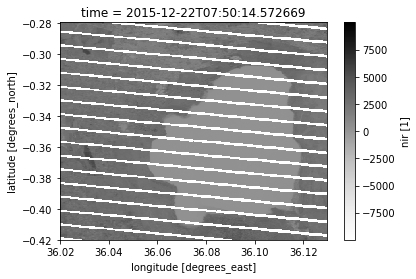

In [10]:
%matplotlib inline
dataset.nir.isel(time = acquisition_number).plot(cmap = "Greys")

> #### Mask clouds and plot the clouds, cloud shadows, or no data, as RED pixels on a NIR image.

In [11]:
from utils.data_cube_utilities.clean_mask import \
    landsat_qa_clean_mask, landsat_clean_mask_invalid

clean_mask = (landsat_qa_clean_mask(dataset, platform) &
              ((dataset != -9999).to_array().all('variable')) &
              landsat_clean_mask_invalid(dataset)).persist()
cleaned_dataset = dataset.where(clean_mask)

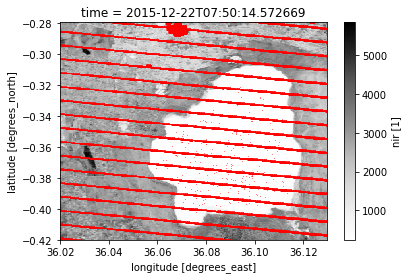

In [12]:
from matplotlib.cm import Greys as red_on_grey
red_on_grey.set_bad('red',.5)

cleaned_dataset.isel(time = acquisition_number).nir.plot(cmap = red_on_grey)

> #### False Color Visualizations  
> Now we will look at two RGB images where the second image includes the cloud, coud shadow and no data mask in RED. Also, the scene is the same as the acquistion selected above.

In [13]:
from utils.data_cube_utilities.dc_rgb import rgb

rgb_da = dataset[['red', 'green', 'blue']].to_array()
# Substitude black pixels for ones with no_data (-9999) values.
rgb_da = rgb_da.where(rgb_da!=-9999, 0)
# Use values fairly close but not equal to the minimum and maximum 
# values as the values of minimum and maximum intensity in the image.
# The goal is to provide fairly consistent image brightness.
vmin = np.quantile(rgb_da.values, 0.10)
vmax = np.quantile(rgb_da.values, 0.90)

(<Figure size 720x566.02 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa421e60e80>)

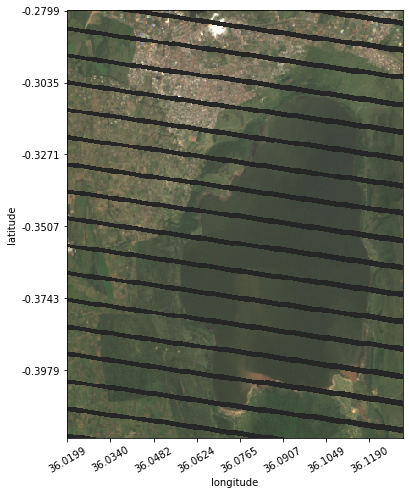

In [14]:
rgb(dataset.isel(time=acquisition_number), 
    min_possible=vmin, max_possible=vmax)

In [15]:
red = [255,0,0]

(<Figure size 720x566.02 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa421b5c208>)

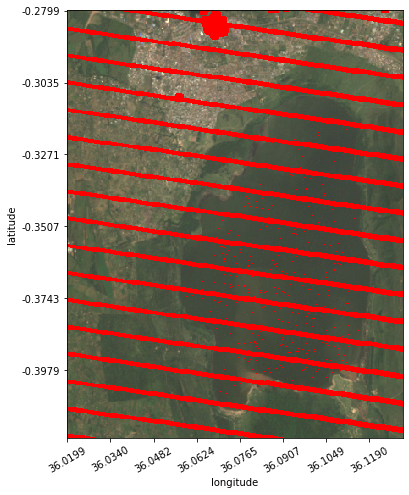

In [16]:
rgb(dataset.isel(time=acquisition_number), 
    # index value is the time slice number
    paint_on_mask = [(~clean_mask[acquisition_number], red)],
    min_possible=vmin, max_possible=vmax)

## <a id="demo_notebook_create_composites"></a>Creating Composites [&#9652;](#demo_notebook_top)

>**Most Recent Pixel Mosaic**   
>Masks clouds from imagery and uses the most recent cloud-free pixels.  

In [17]:
from utils.data_cube_utilities.dc_mosaic import create_mosaic
from utils.data_cube_utilities.dc_utilities import ignore_warnings

most_recent_composite = ignore_warnings(create_mosaic, cleaned_dataset, clean_mask)

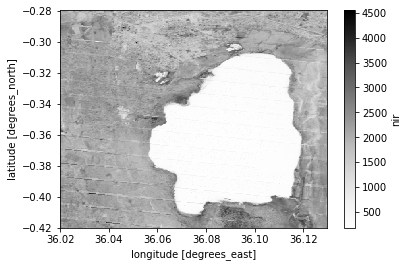

In [18]:
most_recent_composite.nir.plot(cmap = "Greys")

(<Figure size 720x566.02 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa41e8ca7f0>)

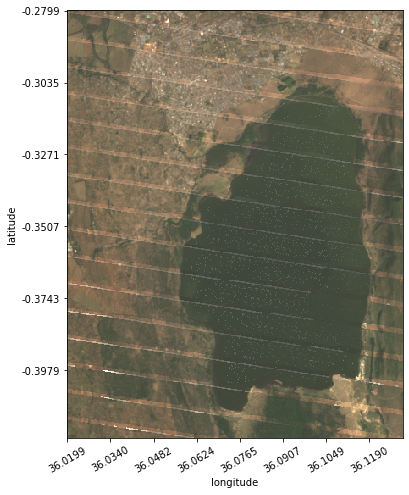

In [19]:
rgb(most_recent_composite, min_possible=vmin, max_possible=vmax)

> **Median Mosaic**  
>  Masks clouds from imagery using the median valued cloud-free pixels in the time series  

In [20]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic

median_composite = ignore_warnings(create_median_mosaic, cleaned_dataset, clean_mask)

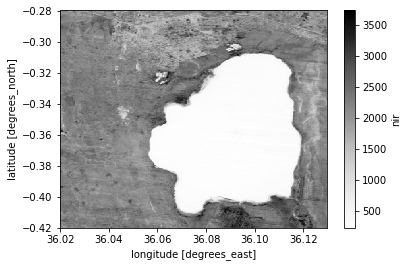

In [21]:
median_composite.nir.plot(cmap = "Greys")

(<Figure size 720x566.02 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa421b33f60>)

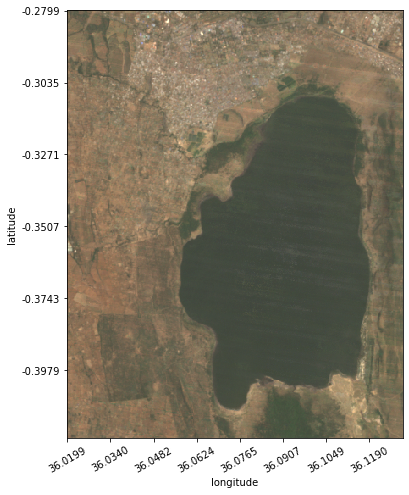

In [22]:
rgb(median_composite, min_possible=vmin, max_possible=vmax)

## <a id="demo_notebook_water_detection"></a>Water Detection [&#9652;](#demo_notebook_top)

In [23]:
from utils.data_cube_utilities.dc_water_classifier import wofs_classify

water_classification = wofs_classify(median_composite, mosaic = True)

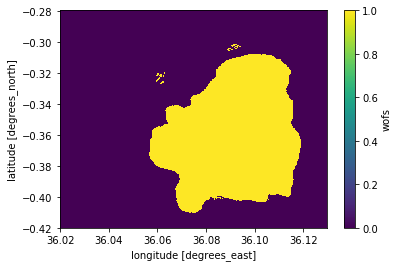

In [24]:
water_classification.wofs.plot()

## <a id="demo_notebook_fractional_cover"></a>Fractional Cover [&#9652;](#demo_notebook_top)

> Fractional Cover (FC) is used for landcover type estimation of vegetation, non-green vegetation, and bare soil of each pixel. We use a model from CSIRO (Juan Gerschmann) and apply it to a median mosaic.  Read more [here](http://data.auscover.org.au/xwiki/bin/view/Product+pages/Landsat+Fractional+Cover).
> 
> The PV component is the estimated probability of a pixel being photosynthetic vegetation. The BS component is the estimated probability of a pixel being bare soil. The NPV component is the estimated probability of a pixel being non-photosynthetic vegetation.

In [25]:
from utils.data_cube_utilities.dc_fractional_coverage_classifier import frac_coverage_classify  
frac_classes = frac_coverage_classify(median_composite) 

**Show the Probabilities of Pixels Being Photosynthetic Vegetation**

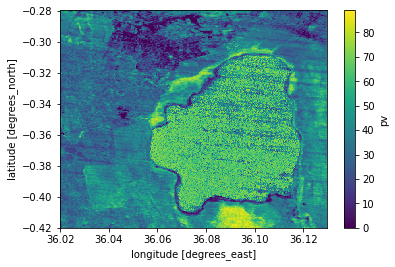

In [26]:
frac_classes.pv.plot()

**Show the Probabilities of Pixels Being Bare Soil**

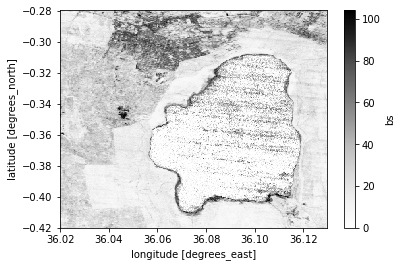

In [27]:
frac_classes.bs.plot(cmap = "Greys")

**Plot a False Color RGB result where RGB = bs/pv/npv.**

(<Figure size 720x566.02 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa42146e550>)

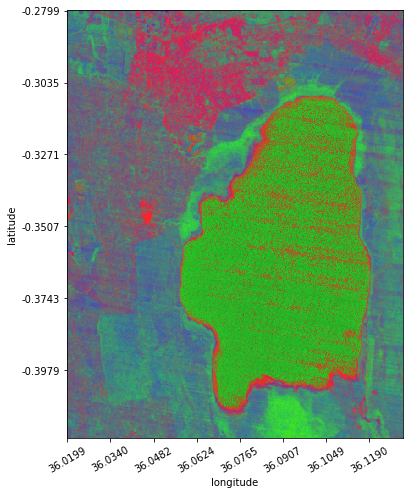

In [28]:
rgb(frac_classes, bands = ['bs', 'pv', 'npv'], 
    min_possible=0, max_possible=100) 

### RGB Color Scale where RGB = bs/pv/npv  

<img src = "diagrams/fractional_cover/frac_cover.PNG" width = 200px style = "float: left;">

## <a id="demo_notebook_spectral_indicies"></a>Spectral Indicies [&#9652;](#demo_notebook_top)

> **NDVI(Normalized Difference Vegetation Index**  
> A derived index that correlates well with the existance of vegetation.  

$$ NDVI =  \frac{(NIR - RED)}{(NIR + RED)}$$  

In [29]:
def NDVI(dataset):
    return (dataset.nir - dataset.red)/(dataset.nir + dataset.red)

> **NDWI Normalized Difference Water Index**  
> A derived index that correlates well with the existance of water.  
<br>

$$ NDWI =  \frac{GREEN - NIR}{GREEN + NIR}$$  

In [30]:
def NDWI(dataset):
    return (dataset.green - dataset.nir)/(dataset.green + dataset.nir)

> **NDBI Normalized Difference Build-Up Index**
> A derived index that correlates well with the existance of urbanization.  
<br>
  
$$NDBI =  \frac{(SWIR - NIR)}{(SWIR + NIR)}$$  

In [31]:
def NDBI(dataset):
        return (dataset.swir2 - dataset.nir)/(dataset.swir2 + dataset.nir)

> #### Evaluate all three indices on a median mosaic  


In [32]:
ndbi = NDBI(median_composite)  # Urbanization - Reds
ndvi = NDVI(median_composite)  # Dense Vegetation - Greens
ndwi = NDWI(median_composite)  # High Concentrations of Water - Blues  

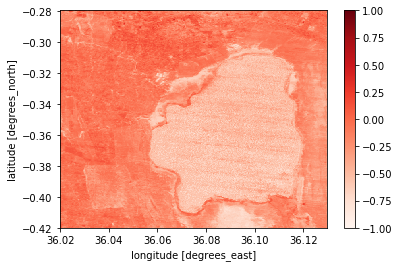

In [33]:
(ndbi).plot(cmap = "Reds", vmin=-1, vmax=1)

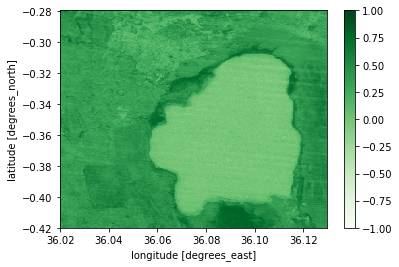

In [34]:
(ndvi).plot(cmap = "Greens", vmin=-1, vmax=1)

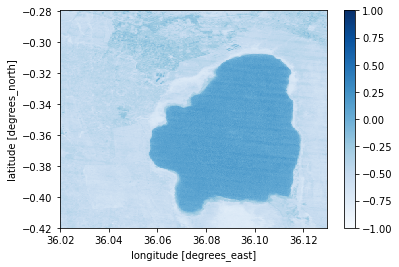

In [35]:
(ndwi).plot(cmap = "Blues", vmin=-1, vmax=1)

> **Merge into one large Dataset**  
> If your data-arrays share the same set of coordinates, or if you feel that you'll be using these values together in the future,  you should consider merging them into a dataset  


In [36]:
ds_ndvi = ndvi.to_dataset(name = "NDVI")
ds_ndwi = ndwi.to_dataset(name=  "NDWI")
ds_ndbi = ndbi.to_dataset(name = "NDBI")

urbanization_dataset = ds_ndvi.merge(ds_ndwi).merge(ds_ndbi)

> #### Display False Color Composite  
Where RGB = NDBI / NDVI / NDWI (Urbanization / Vegetation / Water)

(<Figure size 720x566.02 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa42116d278>)

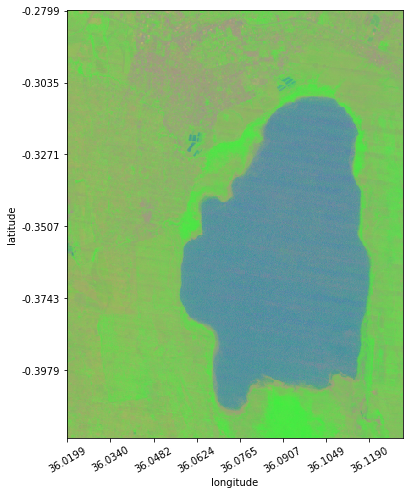

In [37]:
# urbanization_dataset.NDBI.values *= 1 # Scale NDBI for visual purposes 
rgb(urbanization_dataset, bands = ['NDBI', 'NDVI', 'NDWI'], 
    min_possible=-1, max_possible=1)

# TSM  
TSM = Total Suspended Matter. This parameter is a measure of the particulate matter in water and is often a proxy for water quality.

In [38]:
from utils.data_cube_utilities.dc_water_quality import tsm

In [39]:
mask_that_only_includes_water_pixels = water_classification.wofs == 1  
tsm_dataset = tsm(median_composite, clean_mask = mask_that_only_includes_water_pixels )

> ### Plot TSM Results
The TSM value is the mean over the entire time range

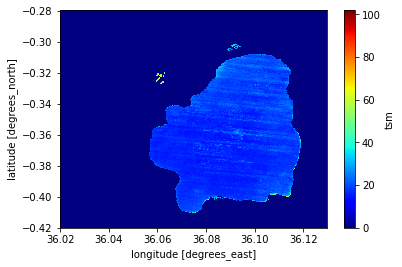

In [40]:
tsm_dataset.tsm.plot(cmap = "jet")

--------------------- 

# Time Series Cloud Cover Analysis
Calculates the average cloud coverage percentages for the analysis area for each time step 

In [41]:
import numpy as np 

def dataset_cloud_percentage_time_series(dataset):
    
    ## Creates an array of True and False Values
    mask = np.logical_or(
        dataset.pixel_qa == 64 + 2,
        dataset.pixel_qa == 64 + 4
    )
    
    mask = np.logical_or(
        mask,
        dataset.pixel_qa == 64 + 8
    )
    
    mask = np.invert(mask)
    mask = mask.astype(np.int16)  ## True/False ----> 1/0  
    cloud_coverage = mask.mean(dim = ['latitude', 'longitude']) ## Find average value(between 1 and 0) per time slice. Treat as percentage
    return (cloud_coverage * 100).rename("cloud_coverage_percentage")

In [42]:
time_series = dataset_cloud_percentage_time_series(dataset)

(array([13.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  3.]),
 array([ 16.66658353,  24.99992518,  33.33326683,  41.66660847,
         49.99995012,  58.33329177,  66.66663341,  74.99997506,
         83.33331671,  91.66665835, 100.        ]),
 <a list of 10 Patch objects>)

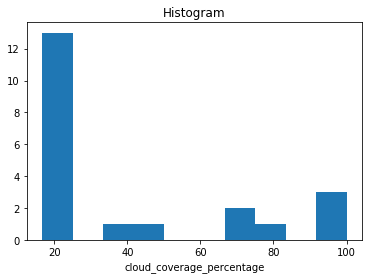

In [43]:
time_series.plot.hist()

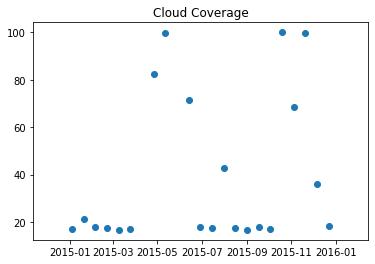

In [44]:
import matplotlib.pyplot as plt

times = time_series.time.values
values = time_series.values

plt.title('Cloud Coverage')
plt.scatter(times, values)

> # Time Series Water Detection Analysis
Time series output of the Australian Water Detection from Space(WOFS) results. The results show the percent of time that a pixel is classified as water over the entire time series. BLUE = frequent water, RED = infrequent water.

In [45]:
ts_water_classification = wofs_classify(dataset, clean_mask) 

In [46]:
# Apply nan to no_data values
ts_water_classification = ts_water_classification.where(ts_water_classification != -9999)

##Time series aggregation that ignores nan values.    
water_classification_percentages = (ts_water_classification.mean(dim = ['time']) * 100).wofs.rename('water_classification_percentages')

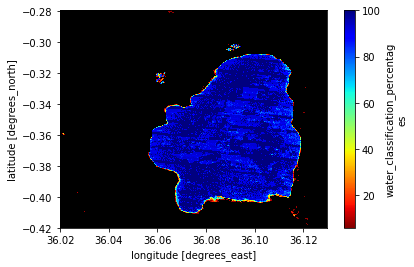

In [47]:
## import color-scheme and set nans to black
from matplotlib.cm import jet_r as jet_r
jet_r.set_bad('black',1)

## apply nan to percentage values that aren't greater than 0, then plot  

water_classification_percentages\
    .where(water_classification_percentages > 0)\
    .plot(cmap = jet_r)